In [1]:
%load_ext autoreload
%autoreload 2

# Get parent directory and add to sys.path
import os
import sys

parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Require ipympl
%matplotlib widget 

In [2]:
# MPC import
import numpy as np
from LinearMPC_template.MPCVelControl import MPCVelControl
from src.rocket import Rocket
from src.vel_rocket_vis import RocketVis
from LinearMPC_template.constants import WX, WY, WZ, ALPHA, BETA, GAMA, VX, VY, VZ, X, Y, Z

rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir, "rocket.yaml")


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

X contains 0*1
Computing maximum invariant set ...
Iteration 1... not yet converged
Iteration 2... not yet converged
Iteration 3... not yet converged
Iteration 4... not yet converged
Iteration 5... not yet converged
Iteration 6... not yet converged
Iteration 7... not yet converged
Iteration 8... not yet converged
Iteration 9... not yet converged
Maximum invariant set successfully computed after 10 iterations.


/Users/jverbois/Python/epfl/MPC-Course-EPFL/.venv/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(


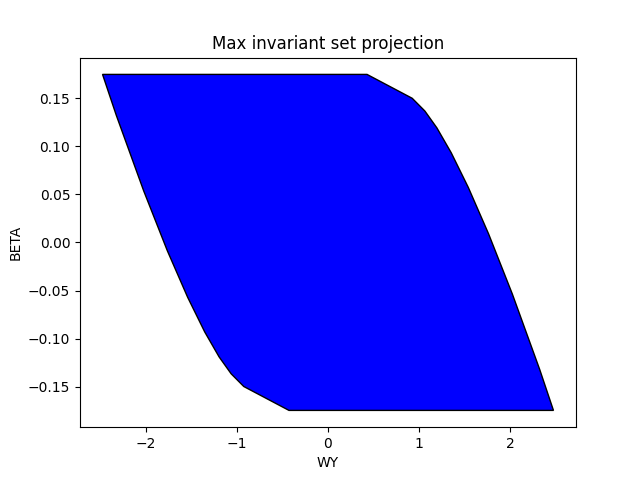

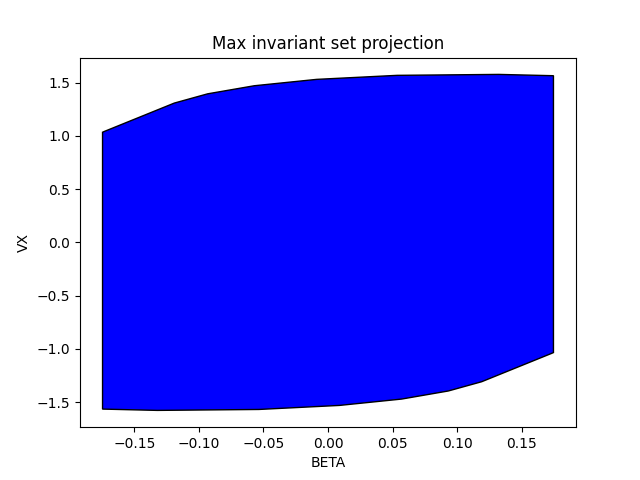

In [3]:
from LinearMPC_template.MPCControl_xvel import MPCControl_xvel

Ts = 0.05
sim_time = 10
H = 5
x0 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
x0[VX] = 5

x_target = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)

xs, us = rocket.trim()
A, B = rocket.linearize(xs, us)
mpc_x = MPCControl_xvel(A, B, xs, us, Ts, H) # Full 12x12 A and 12x4 B matrices
u0, x_traj, u_traj = mpc_x.get_u(x0[np.array([WY, BETA, VX])]) # x and u for single subsystem

X contains 0*1
Computing maximum invariant set ...
Iteration 1... not yet converged
Iteration 2... not yet converged
Iteration 3... not yet converged
Iteration 4... not yet converged
Iteration 5... not yet converged
Iteration 6... not yet converged
Iteration 7... not yet converged
Iteration 8... not yet converged
Iteration 9... not yet converged
Maximum invariant set successfully computed after 10 iterations.


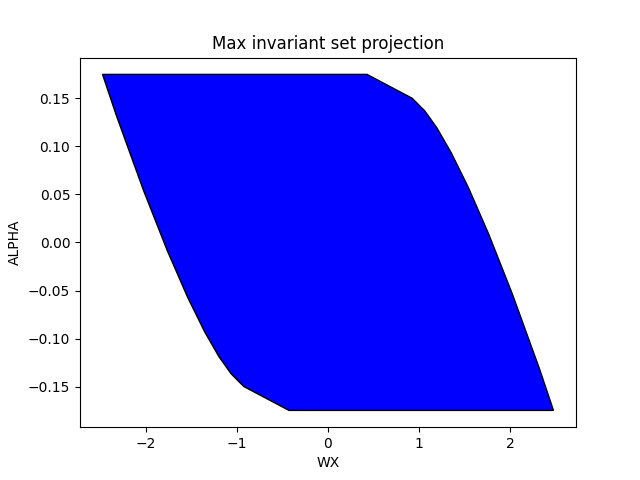

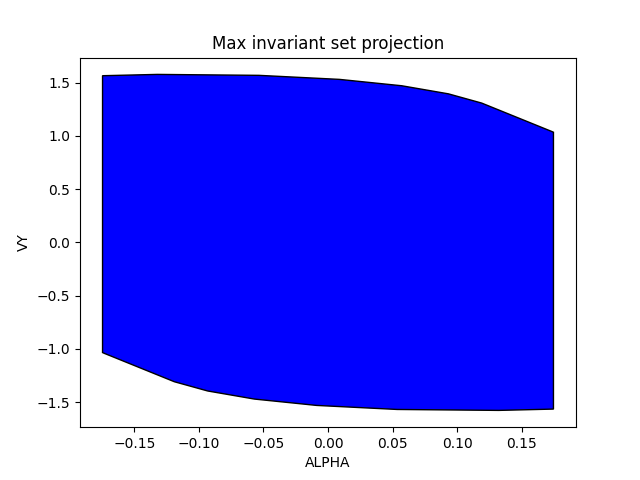

In [4]:
from LinearMPC_template.MPCControl_yvel import MPCControl_yvel

Ts = 0.05
sim_time = 10
H = 5
x0 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
x0[VX] = 5

x_target = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)

xs, us = rocket.trim()
A, B = rocket.linearize(xs, us)
mpc_y = MPCControl_yvel(A, B, xs, us, Ts, H) # Full 12x12 A and 12x4 B matrices
u0, x_traj, u_traj = mpc_y.get_u(x0[np.array([WX, ALPHA, VY])]) # x and u for single subsystem

In [4]:
from LinearMPC_template.MPCControl_zvel import MPCControl_zvel

Ts = 0.05
sim_time = 1
H = 20
x0 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
x0[VZ] = 5

x_target = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)

xs, us = rocket.trim()

A, B = rocket.linearize(xs, us)
mpc_z = MPCControl_zvel(A, B, xs, us, Ts, H) # Full 12x12 A and 12x4 B matrices
u0, x_traj, u_traj = mpc_z.get_u(np.array([x0[VZ]])) # x and u for single subsystem


Computing maximum invariant set ...
VZ >=   -26.7649
VZ <=    13.3825
Maximum invariant set successfully computed after 1 iterations.


In [5]:
print("u0:", u0)
print("x_traj:", x_traj)
print("u_traj:", u_traj)

u0: [60.24072849]
x_traj: [[ 5.00000000e+00  4.95274044e+00  4.90582911e+00  4.85926345e+00
   4.81304092e+00  4.76715898e+00  4.72161513e+00  4.67640687e+00
   4.63153173e+00  4.58698725e+00  4.54277101e+00  4.49888058e+00
   4.45531355e+00  4.41206756e+00  4.36914022e+00  4.32652920e+00
   4.28423216e+00  4.24224679e+00  4.20057080e+00  4.15920190e+00
   4.11813782e+00  4.07737633e+00  4.03691520e+00  3.99675220e+00
   3.95688516e+00  3.91731187e+00  3.87803018e+00  3.83903795e+00
   3.80033303e+00  3.76191331e+00  3.72377669e+00  3.68592108e+00
   3.64834442e+00  3.61104464e+00  3.57401971e+00  3.53726760e+00
   3.50078630e+00  3.46457381e+00  3.42862816e+00  3.39294738e+00
   3.35752952e+00  3.32237263e+00  3.28747480e+00  3.25283412e+00
   3.21844870e+00  3.18431664e+00  3.15043609e+00  3.11680519e+00
   3.08342210e+00  3.05028500e+00  3.01739207e+00  2.98474151e+00
   2.95233155e+00  2.92016040e+00  2.88822630e+00  2.85652752e+00
   2.82506230e+00  2.79382895e+00  2.76282574e+00 

Computing maximum invariant set ...
Iteration 1... not yet converged
Iteration 2... not yet converged
Iteration 3... not yet converged
Iteration 4... not yet converged
Iteration 5... not yet converged
Iteration 6... not yet converged
Iteration 7... not yet converged
Iteration 8... not yet converged
Iteration 9... not yet converged
Iteration 10... not yet converged
Iteration 11... not yet converged
Iteration 12... not yet converged
Iteration 13... not yet converged
Iteration 14... not yet converged
Iteration 15... not yet converged
Iteration 16... not yet converged
Iteration 17... not yet converged
Iteration 18... not yet converged
Iteration 19... not yet converged
Iteration 20... not yet converged
Iteration 21... not yet converged
Iteration 22... not yet converged
Iteration 23... not yet converged
Iteration 24... not yet converged
Iteration 25... not yet converged
Iteration 26... not yet converged
Iteration 27... not yet converged
Iteration 28... not yet converged
Iteration 29... not y

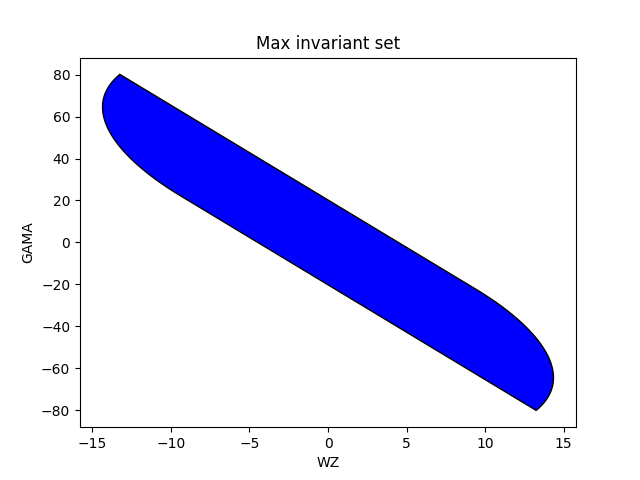

In [6]:
from LinearMPC_template.MPCControl_roll import MPCControl_roll

Ts = 0.05
sim_time = 10
H = 5
x0 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
x0[VX] = 5

x_target = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)

xs, us = rocket.trim()
A, B = rocket.linearize(xs, us)
mpc_roll = MPCControl_roll(A, B, xs, us, Ts, H) # Full 12x12 A and 12x4 B matrices
u0, x_traj, u_traj = mpc_roll.get_u(x0[np.array([WZ, GAMA])]) # x and u for single subsystem

X contains 0*1
Computing maximum invariant set ...
Iteration 1... not yet converged
Iteration 2... not yet converged
Iteration 3... not yet converged
Iteration 4... not yet converged
Iteration 5... not yet converged
Iteration 6... not yet converged
Iteration 7... not yet converged
Iteration 8... not yet converged
Iteration 9... not yet converged
Maximum invariant set successfully computed after 10 iterations.
X contains 0*1
Computing maximum invariant set ...
Iteration 1... not yet converged
Iteration 2... not yet converged
Iteration 3... not yet converged
Iteration 4... not yet converged
Iteration 5... not yet converged
Iteration 6... not yet converged
Iteration 7... not yet converged
Iteration 8... not yet converged
Iteration 9... not yet converged
Maximum invariant set successfully computed after 10 iterations.
Computing maximum invariant set ...
VZ >=   -26.7649
VZ <=    13.3825
Maximum invariant set successfully computed after 1 iterations.
Computing maximum invariant set ...
Iter

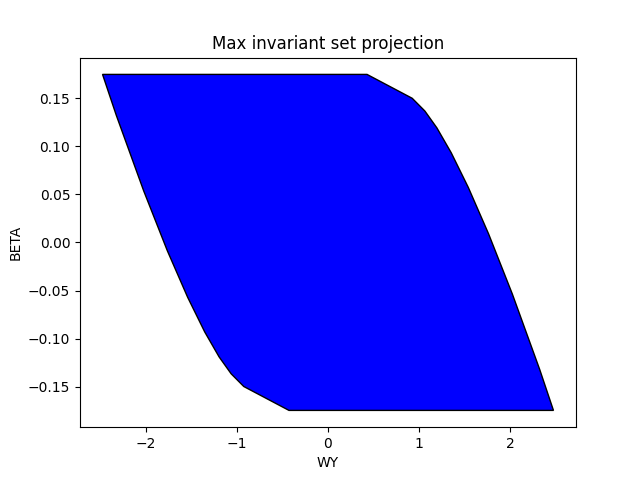

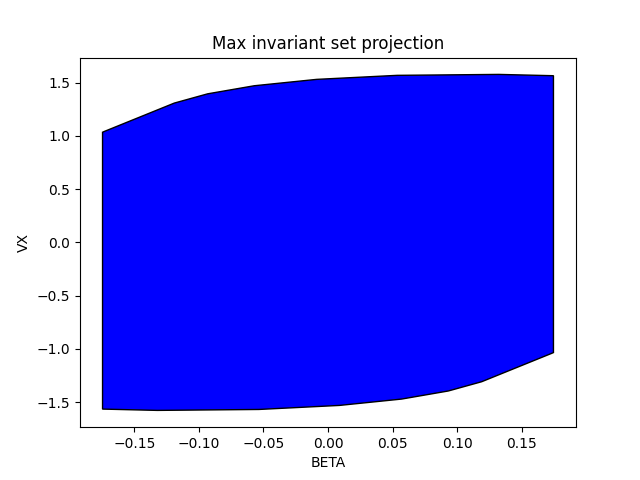

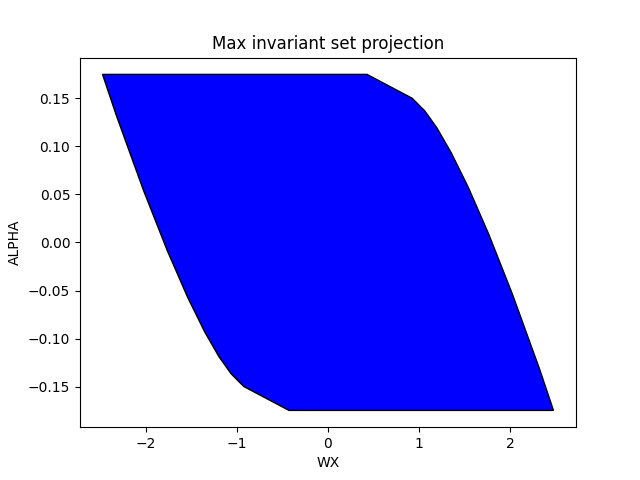

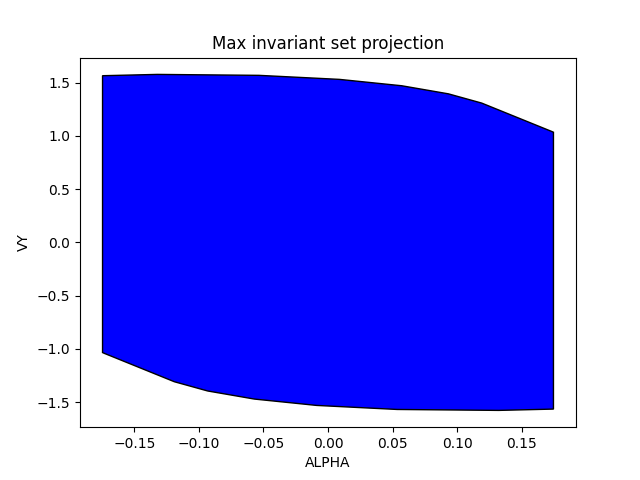

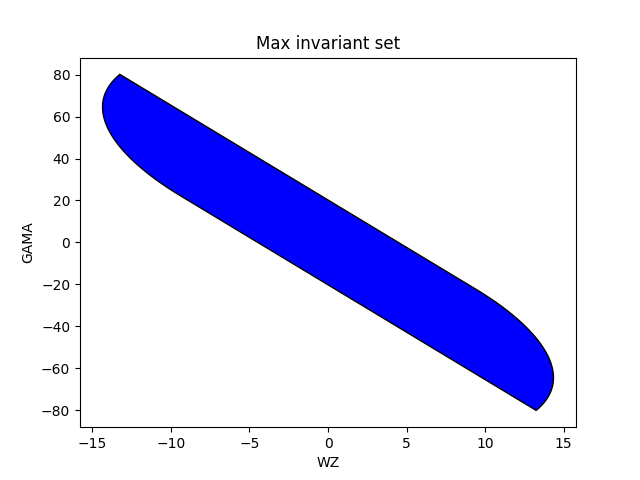

In [6]:
Ts = 0.05
sim_time = 10
H = 5
x0 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
x0[VX] = 5
x0[VY] = 0
x0[VZ] = 0
x0[GAMA] = 0

x_target = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)

xs, us = rocket.trim()
A, B = rocket.linearize(xs, us)
mpc = MPCVelControl().new_controller(rocket, Ts, H)

t_cl, x_cl, u_cl, t_ol, x_ol, u_ol, _ = rocket.simulate_control(
    mpc, sim_time, H, x0, method="linear", x_target=x_target
)



In [8]:
vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 0.8
vis.animate(t_cl[:-1], x_cl[:, :-1], u_cl, T_ol=t_ol[:, :-1], X_ol=x_ol, U_ol=u_ol)

AppLayout(children=(HBox(children=(Play(value=0, description='Press play', interval=125, max=199, step=2), Int…

{'fig': <Figure size 640x480 with 16 Axes>,
 'axes': [<Axes: ylabel='inputs'>,
  <Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: title={'center': 'Subsystem Y'}>,
  <Axes: title={'center': 'Subsystem X'}, ylabel='$\\omega_{\\alpha\\beta\\gamma}$ (deg/s)'>,
  <Axes: title={'center': 'Subsystem Roll'}>,
  <Axes: >,
  <Axes: ylabel='$\\alpha\\beta\\gamma$ (deg)'>,
  <Axes: >,
  <Axes: ylabel='$v$ (m/s)'>,
  <Axes: >,
  <Axes: title={'center': 'Subsystem Z'}>,
  <Axes: ylabel='$\\text{pos}$ (m)'>,
  <Axes: >,
  <Axes: >],
 'plotter': <pyvista.plotting.plotter.Plotter at 0x1696da990>,
 'scene_objects': {'rocket_actor': Actor (0x16b1cfdc0)
    Center:                     (0.32006999999999997, -0.0015085000000000237, 0.5884844999999999)
    Pickable:                   True
    Position:                   (0.0, 0.0, 0.0)
    Scale:                      (1.0, 1.0, 1.0)
    Visible:                    True
    X Bounds                    -6.402E-01, 1.280E+00
    Y Bounds                    -1.212E+0

In [ ]:
vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1.0
t = t_ol[:-1, 0]
x = x_ol[:,:-1, 0]
u = u_ol[:, 0, :-100]
print(t.shape, x.shape, u.shape)
vis.animate(t, x, u)